<a href="https://colab.research.google.com/github/Nikhileswar-Komati/Deep-Learning/blob/master/IMDB_Subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews/subwords8k", with_info = True, as_supervised = True)

2.2.0-rc3


In [20]:
train_data, test_data = imdb['train'], imdb['test']
print(train_data)

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>


In [3]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [4]:
sample_str = "Welcome to TensorFlow !"
tokenized_str = tokenizer.encode(sample_str)
print(tokenized_str)
original_str = tokenizer.decode(tokenized_str)
print(original_str)

[1231, 3202, 3518, 7961, 7, 6307, 2327, 4043, 2120, 5219]
Welcome to TensorFlow !


In [6]:
for ele in tokenized_str:
  print("{} ----> {}".format(ele, tokenizer.decode([ele])))

1231 ----> We
3202 ----> lc
3518 ----> ome
7961 ---->  
7 ----> to 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
5219 ---->  !


In [25]:
embedding_dim = 32
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          261920    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 262,125
Trainable params: 262,125
Non-trainable params: 0
_________________________________________________________________


In [27]:
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

BUFFER_SIZE = 1000
train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32))

test_batches = (
    test_data
    .padded_batch(32))
for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("label shape:", label_batch.shape)
  

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0
Batch shape: (32, 904)
label shape: (32,)
Batch shape: (32, 884)
label shape: (32,)


In [28]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 9s 11ms/step - loss: 0.6557 - accuracy: 0.6561 - val_loss: 0.5671 - val_accuracy: 0.7740
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 0.4401 - accuracy: 0.8428 - val_loss: 0.4115 - val_accuracy: 0.8313
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 0.3198 - accuracy: 0.8869 - val_loss: 0.3653 - val_accuracy: 0.8625
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 0.2711 - accuracy: 0.9022 - val_loss: 0.3542 - val_accuracy: 0.8604
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.2393 - accuracy: 0.9149 - val_loss: 0.3402 - val_accuracy: 0.8698
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 0.2174 - accuracy: 0.9241 - val_loss: 0.3441 - val_accuracy: 0.8708
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 0.1987 - accuracy: 0.9301 - val_loss: 0.3409 - val_accuracy: 0.8719

In [31]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.3328 - accuracy: 0.8774
Loss:  0.3328082263469696
Accuracy:  0.8773999810218811


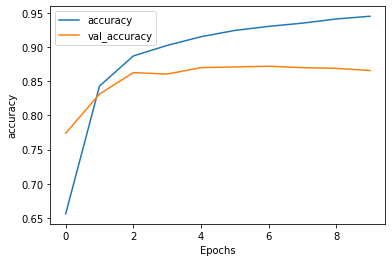

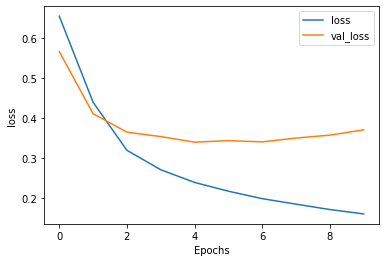

In [30]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[ 'val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graph(history, 'accuracy')
plot_graph(history, 'loss')